In [231]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

In [232]:
# dataset = make_blobs(n_samples=9,
#                     centers=4,
#                     n_features=4,
#                     cluster_std=1.6,
#                     random_state=50)

# points =dataset[0]

In [233]:
df= pd.read_csv('Manipur.csv');
# data= df.iloc[:,3:-2]
# df=df.iloc[9:18]  
single_dist = df.DISTRICT == "BISHNUPUR"
# df=df[single_dist]
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,MANIPUR,BISHNUPUR,2001,29,25,1,1,0,1,3,...,7,21,0,0,0,1,0,0,98,226
1,MANIPUR,CHANDEL,2001,7,7,0,0,0,0,1,...,1,13,0,0,0,0,0,0,20,74
2,MANIPUR,CHURACHANDPUR,2001,35,21,0,1,0,1,0,...,3,3,0,0,0,0,0,0,47,132
3,MANIPUR,IMPHAL(EAST),2001,29,29,2,7,0,7,13,...,8,26,0,2,0,1,0,0,128,337
4,MANIPUR,IMPHAL(WEST),2001,44,42,2,7,0,7,48,...,27,75,0,17,0,3,0,1,521,1084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,MANIPUR,IMPHAL WEST,2012,14,149,3,18,0,18,72,...,14,122,0,21,0,9,0,1,408,1485
104,MANIPUR,SENAPATI,2012,2,19,0,2,0,2,22,...,7,4,0,1,0,0,0,0,51,176
105,MANIPUR,TAMENGLONG,2012,11,5,0,1,0,1,7,...,3,3,0,0,0,0,0,0,18,73
106,MANIPUR,THOUBAL,2012,16,73,0,20,0,20,44,...,22,80,0,12,1,17,0,0,225,691


In [234]:
# data_arr= data.to_numpy()
#Selecting the attributes
data = df[['MURDER','RAPE','THEFT','BURGLARY','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']]
# data = df[['DISTRICT','MURDER']]
# Adding all the crime and storing it on a new column called TOTAL
data["TOTAL"]= data.sum(axis=1)
data

C:\Users\ranjay kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MURDER,RAPE,THEFT,BURGLARY,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,TOTAL
0,29,1,11,6,0,47
1,7,0,1,2,0,10
2,35,1,12,4,0,52
3,29,7,28,12,2,78
4,44,7,121,38,17,227
...,...,...,...,...,...,...
103,14,18,520,17,21,590
104,2,2,13,3,1,21
105,11,1,3,0,0,15
106,16,20,94,8,12,150


In [235]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3)

In [237]:
# plt.scatter(data_arr[:,0],data_arr[:,1])
data_arr = data.iloc[:,1:-1]
data_arr = np.array(data_arr)
# print(data_arr[0][:])
data_arr


array([[  1,  11,   6,   0],
       [  0,   1,   2,   0],
       [  1,  12,   4,   0],
       [  7,  28,  12,   2],
       [  7, 121,  38,  17],
       [  0,   9,   2,   0],
       [  0,   4,   1,   0],
       [  4,  20,   8,   1],
       [  0,  11,   2,   1],
       [  2,   9,   5,   9],
       [  0,   6,   2,   0],
       [  0,   4,   4,   1],
       [  4,  39,   7,   9],
       [  3, 162,  20,  31],
       [  0,   6,   2,   0],
       [  0,   6,   0,   0],
       [  4,  18,   3,   8],
       [  1,   5,   1,   0],
       [  2,  11,   6,  16],
       [  0,   5,   0,   0],
       [  0,  16,   3,   2],
       [  3,  44,   9,   2],
       [  5, 131,  37,  22],
       [  0,   3,   1,   0],
       [  0,   5,   0,   0],
       [  8,  33,  10,   1],
       [  0,   4,   2,   1],
       [  3,  26,   5,   7],
       [  1,   4,   5,   0],
       [  0,   8,   3,   0],
       [  7,  27,   7,   2],
       [  9, 142,  40,  19],
       [  0,   8,   1,   0],
       [  0,   7,   0,   0],
       [ 11,  

In [238]:
clusters = KMeans(4)  # 4 clusters!

clusters.fit( data_arr )
clusters.cluster_centers_
clusters.labels_


data['Crime_clusters'] = clusters.labels_
df['Crime_clusters'] = clusters.labels_
data.sort_values(by=['TOTAL'],ascending = True)



C:\Users\ranjay kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MURDER,RAPE,THEFT,BURGLARY,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,TOTAL,Crime_clusters
53,4,0,1,0,0,5,3
82,3,0,1,1,0,5,3
87,0,0,6,0,0,6,3
96,4,0,1,0,1,6,3
69,3,0,4,0,0,7,3
...,...,...,...,...,...,...,...
67,42,12,219,27,22,322,1
76,32,8,239,37,9,325,1
58,61,7,228,30,28,354,1
94,24,17,496,14,11,562,2


In [291]:
# plt.scatter(points[y_label== 0,0],points[y_label== 0,1],s=50,color='red')
# plt.scatter(points[y_label== 1,0],points[y_label== 1,1],s=50,color='blue')
# plt.scatter(points[y_label== 2,0],points[y_label== 2,1],s=50,color='green')
# plt.scatter(points[y_label== 3,0],points[y_label== 3,1],s=50,color='yellow')
centers = np.array(clusters.cluster_centers_)
center_sum =np.sum(centers,axis=1)
centers
dum_arr= np.array([0,1,2,3])
center_sum


# v_high = df.Crime_clusters == cluster_index[0]
# df[v_high]
State_selected="CHANDEL"
v_high = df.DISTRICT == State_selected
df_dis=df[v_high]
df_dis=df_dis.Crime_clusters
df_dis=df_dis.to_numpy()
len_dis=np.size(df_dis)
# df_dis[6]
DTree_pred=[[0,0,0,0]]
for i in range(0,len_dis):
    cluster_value=df_dis[i]
    index= np.where(cluster_index == cluster_value )
    index=index[0][0]
    DTree_pred[0][index]=DTree_pred[0][index]+1
DTree_pred
y_pred = clf.predict(DTree_pred)
y_pred[0]

3

In [294]:

# plt.scatter(data.iloc[:,-2],data.iloc[:,-1]);
# plt.scatter(center_sum[:], dum_arr[:], marker="x", color='r')
v_high = df.Crime_clusters == cluster_index[3]
df_crime=df[v_high]
df_district=df_crime.DISTRICT == State_selected
df_crime[df_district]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Crime_clusters
1,MANIPUR,CHANDEL,2001,7,7,0,0,0,0,1,...,13,0,0,0,0,0,0,20,74,3
10,MANIPUR,CHANDEL,2002,9,4,0,0,0,0,9,...,19,0,0,0,0,0,4,33,98,3
19,MANIPUR,CHANDEL,2003,17,6,0,0,0,0,3,...,10,0,0,0,0,0,0,31,83,3
28,MANIPUR,CHANDEL,2004,6,13,0,1,0,1,1,...,1,0,0,0,0,0,0,32,64,3
37,MANIPUR,CHANDEL,2005,20,10,0,0,0,0,1,...,5,0,2,0,0,0,0,24,89,3
46,MANIPUR,CHANDEL,2006,14,12,0,2,0,2,2,...,4,0,1,0,0,0,0,17,71,3
55,MANIPUR,CHANDEL,2007,16,17,0,0,0,0,2,...,13,0,0,0,0,0,1,19,88,3
64,MANIPUR,CHANDEL,2008,13,10,0,0,0,0,2,...,20,0,0,0,0,0,0,17,74,3
73,MANIPUR,CHANDEL,2009,6,31,0,0,0,0,0,...,2,0,0,0,0,0,0,16,80,3
82,MANIPUR,CHANDEL,2010,3,5,0,0,0,0,1,...,4,0,0,0,0,0,0,18,59,3


In [293]:
cluster_index = []
# color_dict= dict(Very_High="red", High="brown",Low="orange",Very_Low="yellow")
cluster_intens=['red','brown','orange','yellow']
cluster_color=['red','brown','orange','yellow']
for i in range(0,4):
    index= np.argmax(center_sum) #FInds the max element fron the array
#     print(index)
    center_sum[index]=0;
    
#     np.insert(cluster_index,0,index)
    cluster_index.append(index)
    cluster_color[index]=cluster_intens[i]

print(cluster_color)
print(cluster_index)



['orange', 'brown', 'red', 'yellow']
[2, 1, 0, 3]


C:\Users\ranjay kumar\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


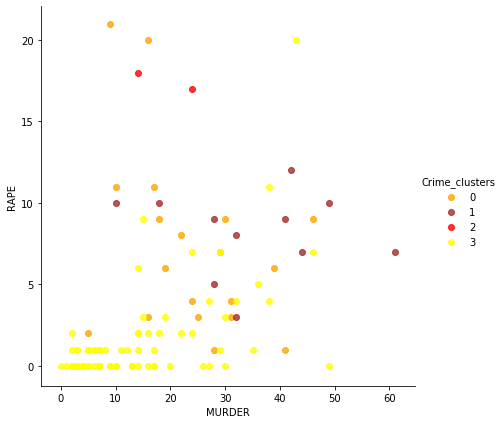

In [242]:
# center_sum
sns.lmplot( 'MURDER','RAPE',  data=data,
        hue = 'Crime_clusters',palette=(cluster_color[0],cluster_color[1],cluster_color[2], cluster_color[3]),
        fit_reg=False, size = 6 );


In [243]:
variables_correlation = df[['MURDER','RAPE','THEFT','BURGLARY','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']]
variables_correlation.corr() 

,MURDER,RAPE,THEFT,BURGLARY,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY
MURDER,1.000000,0.424240,0.327987,0.573080,0.524946
RAPE,0.424240,1.000000,0.641173,0.509834,0.530491
THEFT,0.327987,0.641173,1.000000,0.639165,0.638104
BURGLARY,0.573080,0.509834,0.639165,1.000000,0.725195
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,0.524946,0.530491,0.638104,0.725195,1.000000


In [244]:
DTree_df= pd.read_csv("DTreeT.csv")
DTree_df

,V_High,High,Low,V_Low,O_Label


In [245]:
test=DTree_df
print(test)
# row_df=[1,12,0,0,0]
# df2=pd.DataFrame([row_df],columns=['V_High', 'High','Low','V_Low','O_Label'])
# a_row = pd.Series([1,12,0,0,0])

# row_df = pd.DataFrame([a_row])
# test=pd.concat([row_df, test])
# test=test.append(df2,ignore_index=True)
# test
# arr=[[12,0,0],[19,1,2]]
# arr[1][1]
# arr2=[2,1,3]
# arr.append(arr2)
# arr

Empty DataFrame
Columns: [V_High, High, Low, V_Low, O_Label]
Index: []


In [246]:
arr=[]
for x in range(1,12):
    for i in range(12-x,1,-1):
        col1=12-i-x
        if(col1==0):
            temp_arr=[x,i,0,0,0]
            arr.append(temp_arr)
        for j in range(col1,0,-1):
            col2=12-i-j-x
            if(col1==1):
                temp_arr=[x,i,j,0,0]
                arr.append(temp_arr)
                temp_arr=[x,i,0,j,0]
                arr.append(temp_arr)            
            for k in range(col2,0,-1):
                if(i+j+k+x==12):
                    temp_arr=[x,i,j,k,0]
        #                 print(temp_arr)
                    arr.append(temp_arr)
arr               

[[1, 11, 0, 0, 0],
 [1, 10, 1, 0, 0],
 [1, 10, 0, 1, 0],
 [1, 9, 1, 1, 0],
 [1, 8, 2, 1, 0],
 [1, 8, 1, 2, 0],
 [1, 7, 3, 1, 0],
 [1, 7, 2, 2, 0],
 [1, 7, 1, 3, 0],
 [1, 6, 4, 1, 0],
 [1, 6, 3, 2, 0],
 [1, 6, 2, 3, 0],
 [1, 6, 1, 4, 0],
 [1, 5, 5, 1, 0],
 [1, 5, 4, 2, 0],
 [1, 5, 3, 3, 0],
 [1, 5, 2, 4, 0],
 [1, 5, 1, 5, 0],
 [1, 4, 6, 1, 0],
 [1, 4, 5, 2, 0],
 [1, 4, 4, 3, 0],
 [1, 4, 3, 4, 0],
 [1, 4, 2, 5, 0],
 [1, 4, 1, 6, 0],
 [1, 3, 7, 1, 0],
 [1, 3, 6, 2, 0],
 [1, 3, 5, 3, 0],
 [1, 3, 4, 4, 0],
 [1, 3, 3, 5, 0],
 [1, 3, 2, 6, 0],
 [1, 3, 1, 7, 0],
 [1, 2, 8, 1, 0],
 [1, 2, 7, 2, 0],
 [1, 2, 6, 3, 0],
 [1, 2, 5, 4, 0],
 [1, 2, 4, 5, 0],
 [1, 2, 3, 6, 0],
 [1, 2, 2, 7, 0],
 [1, 2, 1, 8, 0],
 [2, 10, 0, 0, 0],
 [2, 9, 1, 0, 0],
 [2, 9, 0, 1, 0],
 [2, 8, 1, 1, 0],
 [2, 7, 2, 1, 0],
 [2, 7, 1, 2, 0],
 [2, 6, 3, 1, 0],
 [2, 6, 2, 2, 0],
 [2, 6, 1, 3, 0],
 [2, 5, 4, 1, 0],
 [2, 5, 3, 2, 0],
 [2, 5, 2, 3, 0],
 [2, 5, 1, 4, 0],
 [2, 4, 5, 1, 0],
 [2, 4, 4, 2, 0],
 [2, 4, 3, 3, 0],
 [2, 4

In [247]:

for i in range(12,0,-1):
    col1=12-i
    if(col1==0):
        temp_arr=[0,i,0,0,1]
        arr.append(temp_arr)
    for j in range(col1,1,-1):
        col2=12-i-j
        if(col1==1):
            temp_arr=[0,i,j,0,1]
            arr.append(temp_arr)
            temp_arr=[0,i,0,j,1]
            arr.append(temp_arr)            
        for k in range(col2,0,-1):
            if(i+j+k==12):
                temp_arr=[0,i,j,k,1]
    #                 print(temp_arr)
                arr.append(temp_arr)
arr

[[1, 11, 0, 0, 0],
 [1, 10, 1, 0, 0],
 [1, 10, 0, 1, 0],
 [1, 9, 1, 1, 0],
 [1, 8, 2, 1, 0],
 [1, 8, 1, 2, 0],
 [1, 7, 3, 1, 0],
 [1, 7, 2, 2, 0],
 [1, 7, 1, 3, 0],
 [1, 6, 4, 1, 0],
 [1, 6, 3, 2, 0],
 [1, 6, 2, 3, 0],
 [1, 6, 1, 4, 0],
 [1, 5, 5, 1, 0],
 [1, 5, 4, 2, 0],
 [1, 5, 3, 3, 0],
 [1, 5, 2, 4, 0],
 [1, 5, 1, 5, 0],
 [1, 4, 6, 1, 0],
 [1, 4, 5, 2, 0],
 [1, 4, 4, 3, 0],
 [1, 4, 3, 4, 0],
 [1, 4, 2, 5, 0],
 [1, 4, 1, 6, 0],
 [1, 3, 7, 1, 0],
 [1, 3, 6, 2, 0],
 [1, 3, 5, 3, 0],
 [1, 3, 4, 4, 0],
 [1, 3, 3, 5, 0],
 [1, 3, 2, 6, 0],
 [1, 3, 1, 7, 0],
 [1, 2, 8, 1, 0],
 [1, 2, 7, 2, 0],
 [1, 2, 6, 3, 0],
 [1, 2, 5, 4, 0],
 [1, 2, 4, 5, 0],
 [1, 2, 3, 6, 0],
 [1, 2, 2, 7, 0],
 [1, 2, 1, 8, 0],
 [2, 10, 0, 0, 0],
 [2, 9, 1, 0, 0],
 [2, 9, 0, 1, 0],
 [2, 8, 1, 1, 0],
 [2, 7, 2, 1, 0],
 [2, 7, 1, 2, 0],
 [2, 6, 3, 1, 0],
 [2, 6, 2, 2, 0],
 [2, 6, 1, 3, 0],
 [2, 5, 4, 1, 0],
 [2, 5, 3, 2, 0],
 [2, 5, 2, 3, 0],
 [2, 5, 1, 4, 0],
 [2, 4, 5, 1, 0],
 [2, 4, 4, 2, 0],
 [2, 4, 3, 3, 0],
 [2, 4

In [248]:
var=12
x=var
while(x!=0):
    temp_arr=[0,0,x,var-x,2]
    x=x-1
    arr.append(temp_arr)
arr

[[1, 11, 0, 0, 0],
 [1, 10, 1, 0, 0],
 [1, 10, 0, 1, 0],
 [1, 9, 1, 1, 0],
 [1, 8, 2, 1, 0],
 [1, 8, 1, 2, 0],
 [1, 7, 3, 1, 0],
 [1, 7, 2, 2, 0],
 [1, 7, 1, 3, 0],
 [1, 6, 4, 1, 0],
 [1, 6, 3, 2, 0],
 [1, 6, 2, 3, 0],
 [1, 6, 1, 4, 0],
 [1, 5, 5, 1, 0],
 [1, 5, 4, 2, 0],
 [1, 5, 3, 3, 0],
 [1, 5, 2, 4, 0],
 [1, 5, 1, 5, 0],
 [1, 4, 6, 1, 0],
 [1, 4, 5, 2, 0],
 [1, 4, 4, 3, 0],
 [1, 4, 3, 4, 0],
 [1, 4, 2, 5, 0],
 [1, 4, 1, 6, 0],
 [1, 3, 7, 1, 0],
 [1, 3, 6, 2, 0],
 [1, 3, 5, 3, 0],
 [1, 3, 4, 4, 0],
 [1, 3, 3, 5, 0],
 [1, 3, 2, 6, 0],
 [1, 3, 1, 7, 0],
 [1, 2, 8, 1, 0],
 [1, 2, 7, 2, 0],
 [1, 2, 6, 3, 0],
 [1, 2, 5, 4, 0],
 [1, 2, 4, 5, 0],
 [1, 2, 3, 6, 0],
 [1, 2, 2, 7, 0],
 [1, 2, 1, 8, 0],
 [2, 10, 0, 0, 0],
 [2, 9, 1, 0, 0],
 [2, 9, 0, 1, 0],
 [2, 8, 1, 1, 0],
 [2, 7, 2, 1, 0],
 [2, 7, 1, 2, 0],
 [2, 6, 3, 1, 0],
 [2, 6, 2, 2, 0],
 [2, 6, 1, 3, 0],
 [2, 5, 4, 1, 0],
 [2, 5, 3, 2, 0],
 [2, 5, 2, 3, 0],
 [2, 5, 1, 4, 0],
 [2, 4, 5, 1, 0],
 [2, 4, 4, 2, 0],
 [2, 4, 3, 3, 0],
 [2, 4

In [249]:
for i in range(12,0,-1):
    temp_arr=[0,0,0,i,3]
    arr.append(temp_arr)
arr

[[1, 11, 0, 0, 0],
 [1, 10, 1, 0, 0],
 [1, 10, 0, 1, 0],
 [1, 9, 1, 1, 0],
 [1, 8, 2, 1, 0],
 [1, 8, 1, 2, 0],
 [1, 7, 3, 1, 0],
 [1, 7, 2, 2, 0],
 [1, 7, 1, 3, 0],
 [1, 6, 4, 1, 0],
 [1, 6, 3, 2, 0],
 [1, 6, 2, 3, 0],
 [1, 6, 1, 4, 0],
 [1, 5, 5, 1, 0],
 [1, 5, 4, 2, 0],
 [1, 5, 3, 3, 0],
 [1, 5, 2, 4, 0],
 [1, 5, 1, 5, 0],
 [1, 4, 6, 1, 0],
 [1, 4, 5, 2, 0],
 [1, 4, 4, 3, 0],
 [1, 4, 3, 4, 0],
 [1, 4, 2, 5, 0],
 [1, 4, 1, 6, 0],
 [1, 3, 7, 1, 0],
 [1, 3, 6, 2, 0],
 [1, 3, 5, 3, 0],
 [1, 3, 4, 4, 0],
 [1, 3, 3, 5, 0],
 [1, 3, 2, 6, 0],
 [1, 3, 1, 7, 0],
 [1, 2, 8, 1, 0],
 [1, 2, 7, 2, 0],
 [1, 2, 6, 3, 0],
 [1, 2, 5, 4, 0],
 [1, 2, 4, 5, 0],
 [1, 2, 3, 6, 0],
 [1, 2, 2, 7, 0],
 [1, 2, 1, 8, 0],
 [2, 10, 0, 0, 0],
 [2, 9, 1, 0, 0],
 [2, 9, 0, 1, 0],
 [2, 8, 1, 1, 0],
 [2, 7, 2, 1, 0],
 [2, 7, 1, 2, 0],
 [2, 6, 3, 1, 0],
 [2, 6, 2, 2, 0],
 [2, 6, 1, 3, 0],
 [2, 5, 4, 1, 0],
 [2, 5, 3, 2, 0],
 [2, 5, 2, 3, 0],
 [2, 5, 1, 4, 0],
 [2, 4, 5, 1, 0],
 [2, 4, 4, 2, 0],
 [2, 4, 3, 3, 0],
 [2, 4

In [250]:
x,y = np.shape(arr)
for i in range(0,x):
    df2=pd.DataFrame([arr[i][:]],columns=['V_High', 'High','Low','V_Low','O_Label'])
    DTree_df=DTree_df.append(df2,ignore_index=True)
    
DTree_df

,V_High,High,Low,V_Low,O_Label
0,1,11,0,0,0
1,1,10,1,0,0
2,1,10,0,1,0
3,1,9,1,1,0
4,1,8,2,1,0
...,...,...,...,...,...
213,0,0,0,5,3
214,0,0,0,4,3
215,0,0,0,3,3
216,0,0,0,2,3


In [251]:
feature_cols = ['V_High', 'High', 'Low', 'V_Low']
X = DTree_df[feature_cols] # Features
y = DTree_df.O_Label # Target variable
X=X.to_numpy()
X=X.astype(np.int)
y=y.to_numpy()
y=y.astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [252]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
ClasF = DecisionTreeClassifier()

# # Train Decision Tree Classifer
clf = ClasF.fit(X,y)

In [253]:
#Predict the response for test dataset
X_test=np.array([[0,2,7,3]])
y_pred = clf.predict(X_test)
y_pred

array([1])

In [290]:
single_dist = df.DISTRICT == "CHANDEL"
df=df[single_dist]
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Crime_clusters
1,MANIPUR,CHANDEL,2001,7,7,0,0,0,0,1,...,13,0,0,0,0,0,0,20,74,3
10,MANIPUR,CHANDEL,2002,9,4,0,0,0,0,9,...,19,0,0,0,0,0,4,33,98,3
19,MANIPUR,CHANDEL,2003,17,6,0,0,0,0,3,...,10,0,0,0,0,0,0,31,83,3
28,MANIPUR,CHANDEL,2004,6,13,0,1,0,1,1,...,1,0,0,0,0,0,0,32,64,3
37,MANIPUR,CHANDEL,2005,20,10,0,0,0,0,1,...,5,0,2,0,0,0,0,24,89,3
46,MANIPUR,CHANDEL,2006,14,12,0,2,0,2,2,...,4,0,1,0,0,0,0,17,71,3
55,MANIPUR,CHANDEL,2007,16,17,0,0,0,0,2,...,13,0,0,0,0,0,1,19,88,3
64,MANIPUR,CHANDEL,2008,13,10,0,0,0,0,2,...,20,0,0,0,0,0,0,17,74,3
73,MANIPUR,CHANDEL,2009,6,31,0,0,0,0,0,...,2,0,0,0,0,0,0,16,80,3
82,MANIPUR,CHANDEL,2010,3,5,0,0,0,0,1,...,4,0,0,0,0,0,0,18,59,3
